In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Check data shape and preview
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Check for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
# Data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Converting 'date_added' column to proper datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Previewing the updated 'date_added' column
df['date_added'].head()

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1442. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [5]:
# Converting 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [6]:
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [7]:
# Checking how many null values are in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# Dropping rows where 'title' is missing (title is essential)
df = df.dropna(subset=['title'])

In [9]:
# Filling missing 'director' and 'cast' with 'Not Specified' as it's optional
df['director'] = df['director'].fillna('Not Specified')
df['cast'] = df['cast'].fillna('Not Specified')

In [10]:
# Filling missing 'country' with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

In [11]:
# Filling missing 'date_added' with the mode (most common date)
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


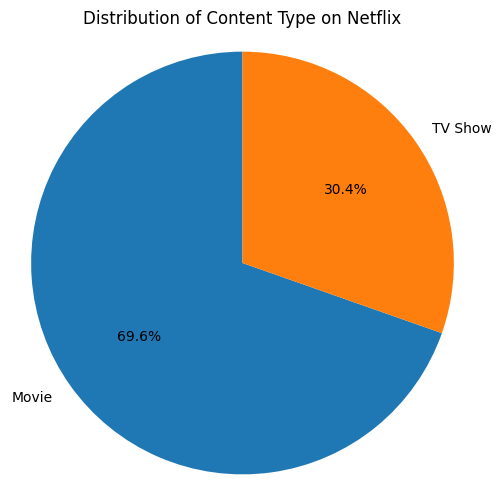

In [12]:
# Count of Movies vs TV Shows
content_type_counts = df['type'].value_counts()

# Display counts
print(content_type_counts)

# Visualize as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Content Type on Netflix")
plt.axis('equal')
plt.show()